In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [25]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
183268,183268,280288,280289,How did monkeys get to South America from Afri...,"I fucking hate my life, I'm black, poor nd liv...",0
112930,112930,184684,132960,What is the best photo ever taken in your life?,What is the best picture taken by you?,1
300075,300075,348955,422827,What are some things new employees should know...,What are some things new employees should know...,0
223993,223993,296218,184831,Why do the British care about the Royal Family?,Why has the UK retained the monarchy?,0
171389,171389,177374,264819,Which is the most inspiring book to read?,What is the most inspiring book you have ever ...,0
357002,357002,486390,486391,Why can't I forget my girlfriend?,Why can't I forget my first girlfriend?,1
348760,348760,477337,477338,Which is greater rise in 1 degree Celsius or r...,If I sit and hold 100 grams of ice at zero deg...,0
119950,119950,194645,194646,What are some ways to amplify linear motion an...,How do you amplify linear motion?,1
209885,209885,314294,314295,How should one prepare for IAS when he is in h...,How can I prepare for IAS from my first year o...,1
23430,23430,43885,43886,"In the initial days of a SaaS startup, when th...",I have to manage the entire operations and pro...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

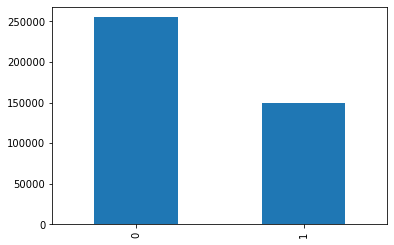

In [17]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [19]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


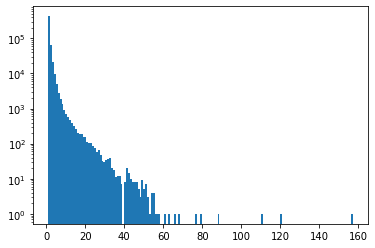

In [20]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()